In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:

df = pd.read_csv('../data/spotify.csv', encoding='latin-1')
#I'm not sure whatsup with this encoding, but it gave me an error originally.
# When i passed the error to chatgpt it told me to try this. ¯\_(ツ)_/¯


<h1>Goals</h1>

1. A high-level summary of the data through EDA.
2. Some highlight facts about the data through well-designed visualizations.
3. Some ideas about how to use this data in business or policy from what you have
learned.
4. Present the above to the audience.

In [4]:
print(f"We have {df.shape[0]} entries and {df.shape[1]} columns")
print(len(df['Artist'].unique()),'artists')
print(len(df['Track'].unique()), 'Tracks')

We have 4600 entries and 29 columns
2000 artists
4370 Tracks


<h1> Column Descriptions </h1>

+         Track Name: Name of the song.
+         Album Name: Name of the album the song belongs to.
+         Artist: Name of the artist(s) of the song.
+         Release Date: Date when the song was released.
+         ISRC: International Standard Recording Code for the song.
+         All Time Rank: Ranking of the song based on its all-time popularity.
+         Track Score: Score assigned to the track based on various factors.
+         Spotify Streams: Total number of streams on Spotify.
+         Spotify Playlist Count: Number of Spotify playlists the song is included in.
+         Spotify Playlist Reach: Reach of the song across Spotify playlists.
+         Spotify Popularity: Popularity score of the song on Spotify.
+         YouTube Views: Total views of the song's official video on YouTube.
+         YouTube Likes: Total likes on the song's official video on YouTube.
+         TikTok Posts: Number of TikTok posts featuring the song.
+         TikTok Likes: Total likes on TikTok posts featuring the song.
+         TikTok Views: Total views on TikTok posts featuring the song.
+         YouTube Playlist Reach: Reach of the song across YouTube playlists.
+         Apple Music Playlist Count: Number of Apple Music playlists the song is included in.
+         AirPlay Spins: Number of times the song has been played on radio stations.
+         SiriusXM Spins: Number of times the song has been played on SiriusXM.
+         Deezer Playlist Count: Number of Deezer playlists the song is included in.
+         Deezer Playlist Reach: Reach of the song across Deezer playlists.
+         Amazon Playlist Count: Number of Amazon Music playlists the song is included in.
+         Pandora Streams: Total number of streams on Pandora.
+         Pandora Track Stations: Number of Pandora stations featuring the song.
+         Soundcloud Streams: Total number of streams on Soundcloud.
+         Shazam Counts: Total number of times the song has been Shazamed.
+         TIDAL Popularity: Popularity score of the song on TIDAL.
+         Explicit Track: Indicates whether the song contains explicit content.

In [5]:
df.isnull().any()

#Most cols have missing values

#Seems to me like our target variable is Spotify Streams? What do y'all think?

Track                         False
Album Name                    False
Artist                         True
Release Date                  False
ISRC                          False
All Time Rank                 False
Track Score                   False
Spotify Streams                True
Spotify Playlist Count         True
Spotify Playlist Reach         True
Spotify Popularity             True
YouTube Views                  True
YouTube Likes                  True
TikTok Posts                   True
TikTok Likes                   True
TikTok Views                   True
YouTube Playlist Reach         True
Apple Music Playlist Count     True
AirPlay Spins                  True
SiriusXM Spins                 True
Deezer Playlist Count          True
Deezer Playlist Reach          True
Amazon Playlist Count          True
Pandora Streams                True
Pandora Track Stations         True
Soundcloud Streams             True
Shazam Counts                  True
TIDAL Popularity            

In [6]:
df['Spotify Streams'].isnull().sum()
#113 missing values. 
# In lecture yesterday she said if your target is missing, drop those rows. 



113

In [7]:
df_cleaned = df.dropna(subset=['Spotify Streams'])
print(len(df) - len(df_cleaned))
#just double checking that that function worked :) 
df_cleaned.dtypes
#Hmm, I think Spotify Streams should be int type. 
#Get rid of commas so we can convert to int type.
df_cleaned['Spotify Streams'] = df_cleaned['Spotify Streams'].str.replace(',','')
df_cleaned['Spotify Streams'] = df_cleaned['Spotify Streams'].astype('int')
print(df_cleaned['Spotify Streams'].dtype)



113
int64


/var/folders/vb/c_7gcdvd2kg4s_jdwfky3xhm0000gn/T/ipykernel_34931/2859299194.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Spotify Streams'] = df_cleaned['Spotify Streams'].str.replace(',','')
/var/folders/vb/c_7gcdvd2kg4s_jdwfky3xhm0000gn/T/ipykernel_34931/2859299194.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Spotify Streams'] = df_cleaned['Spotify Streams'].astype('int')


In [8]:
# Try cleaning by dropping na instead of filling
tik_tok_cols= ['TikTok Likes', 'TikTok Posts', 'TikTok Views', 'YouTube Views']
for col in tik_tok_cols:
    df_cleaned[col] = df_cleaned[col].fillna(1)
    if df_cleaned[col].dtype == 'object':  # Check if the column is of type object (usually string)
        df_cleaned[col] = df_cleaned[col].astype(str).str.replace(',', '').astype(float).astype(int)
    print(df_cleaned[col].dtype)


int64
int64
int64
int64


/var/folders/vb/c_7gcdvd2kg4s_jdwfky3xhm0000gn/T/ipykernel_34931/1646121475.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = df_cleaned[col].fillna(1)
/var/folders/vb/c_7gcdvd2kg4s_jdwfky3xhm0000gn/T/ipykernel_34931/1646121475.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = df_cleaned[col].astype(str).str.replace(',', '').astype(float).astype(int)
/var/folders/vb/c_7gcdvd2kg4s_jdwfky3xhm0000gn/T/ipykernel_34931/1646121475.py:4: SettingWithCopyWarning: 
A value is t

In [9]:
views_by_artist = df_cleaned.groupby('Artist')['TikTok Views'].sum().sort_values()
most_views = views_by_artist[:-10:-1].sort_values(ascending=True)
views=most_views.values
artists=most_views.index.values

likes_by_artist = df_cleaned.groupby('Artist')['TikTok Likes'].sum().sort_values()
most_likes = likes_by_artist.loc[artists]
likes=most_likes.values

posts_by_artist = df_cleaned.groupby('Artist')['TikTok Posts'].sum().sort_values()
most_posts = posts_by_artist.loc[artists]
posts=most_posts.values

streams_by_artist= df_cleaned.groupby('Artist')['Spotify Streams'].sum().sort_values(ascending=False)
toptiktokstreams = streams_by_artist.loc[artists]
streams=toptiktokstreams.values

yt_views_by_artist = df_cleaned.groupby('Artist')['YouTube Views'].sum().sort_values()
yt_views = yt_views_by_artist[:-10:-1].sort_values(ascending=True)
yt_views=yt_views.values



In [10]:
tikclean = df.dropna(subset=['Spotify Streams', 'TikTok Views'])
cols=['Spotify Streams', 'TikTok Views']
for col in cols:
    if tikclean[col].dtype == 'object':  # Check if the column is of type object (usually string)
        tikclean[col] = tikclean[col].astype(str).str.replace(',', '').astype(float).astype(int)


streams_views_by_artist = tikclean.groupby('Artist')[['Spotify Streams', 'TikTok Views']].sum().sort_values(by='Spotify Streams', ascending=False)

streams_views_by_artist

/var/folders/vb/c_7gcdvd2kg4s_jdwfky3xhm0000gn/T/ipykernel_34931/941148077.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tikclean[col] = tikclean[col].astype(str).str.replace(',', '').astype(float).astype(int)
/var/folders/vb/c_7gcdvd2kg4s_jdwfky3xhm0000gn/T/ipykernel_34931/941148077.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tikclean[col] = tikclean[col].astype(str).str.replace(',', '').astype(float).astype(int)


,Spotify Streams,TikTok Views
Artist,,
Bad Bunny,35999114537,45947009631
The Weeknd,33324614624,14358656336
Drake,32386979999,22477366399
Taylor Swift,30503565570,30020057523
Ed Sheeran,24014427062,22141665963
...,...,...
Barracca Republic,3739,504872722
BCD Studio,3711,1319467906
TOADI,3574,312937612


                     Spotify Streams  TikTok Views      tik_diff
Artist                                                          
Manu                       181784966           179 -1.015557e+06
YSY A                      116625807           305 -3.823787e+05
KHEA                       376842137          1068 -3.528474e+05
Sam Barber                 174154846          2771 -6.284810e+04
Pritam                      25820250           490 -5.269339e+04
Heuss L'enfoirï¿           107498014          3247 -3.310587e+04
Uzielito Mix                99086405          7595 -1.304527e+04
Angi Fire                   14137400          1172 -1.206163e+04
Sachin-Jigar               226109929         19132 -1.181742e+04
Cï¿½ï¿½dig                 188309858         18855 -9.986264e+03
Grupo Menos ï¿½ï¿½         270944683        102989 -2.629812e+03


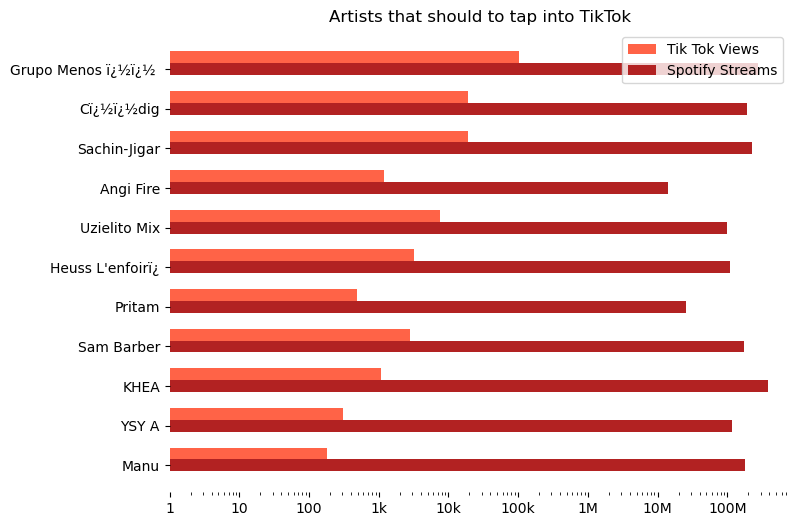

In [11]:
streams_views_by_artist['tik_diff'] = ( streams_views_by_artist['TikTok Views'] - streams_views_by_artist['Spotify Streams']) /streams_views_by_artist['TikTok Views']
top_10= streams_views_by_artist.sort_values(by='tik_diff', ascending=True)[:11]
print(top_10)
artists=top_10.index.values

fig, ax =plt.subplots(figsize=(8,6))
h=0.3
views= top_10['TikTok Views']
streams=top_10['Spotify Streams']

ax.barh(np.arange(len(artists))+h, views,height=h, label='Tik Tok Views', color='tomato')
ax.barh(np.arange(len(artists)), streams,height=h, label='Spotify Streams',color='firebrick')

ax.set_xscale('log')
ax.set_xticks([1, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8])
ax.set_xticklabels(['1', '10', '100', '1k', '10k', '100k', '1M', '10M', '100M'])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_title('Artists that should to tap into TikTok')

ax.set_yticks(np.arange(len(artists)))
ax.set_yticklabels(artists)
ax.legend(loc='best')
plt.show()


In [12]:
youclean = df.dropna(subset=['Spotify Streams', 'YouTube Views'])
cols=['Spotify Streams', 'YouTube Views']

for col in cols:
    print(col)
    if youclean[col].dtype == 'object':  # Check if the column is of type object (usually string)
        youclean[col] = youclean[col].astype(str).str.replace(',', '').astype(float).astype(int)

youclean.dtypes

spoyou = youclean.groupby('Artist')[['Spotify Streams', 'YouTube Views']].sum().sort_values(by='Spotify Streams', ascending=False)

spoyou

Spotify Streams
YouTube Views


/var/folders/vb/c_7gcdvd2kg4s_jdwfky3xhm0000gn/T/ipykernel_34931/3775789867.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  youclean[col] = youclean[col].astype(str).str.replace(',', '').astype(float).astype(int)
/var/folders/vb/c_7gcdvd2kg4s_jdwfky3xhm0000gn/T/ipykernel_34931/3775789867.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  youclean[col] = youclean[col].astype(str).str.replace(',', '').astype(float).astype(int)


,Spotify Streams,YouTube Views
Artist,,
Bad Bunny,36336985388,25072757092
Drake,34515643882,9525032982
The Weeknd,34141482745,18635601580
Taylor Swift,33724065345,20140603852
Post Malone,25887392545,13465040833
...,...,...
mitsu sound,1384,222076
Zeme Libre,1332,411286256
Dan-E-MC,1224,389845206


                   Spotify Streams  YouTube Views
Artist                                           
Serranow                      8402     1152050786
Dave Angel                    8082     2055940513
PowerDress                    7909     1999374091
Vanco                         3835     1438604417
Muramatsu Karaoke             3531     3250879013
Bob and Tom                   3115     2730590985
Dada Black Sheep              2754     1197426502
Azul                          1186     1231300374


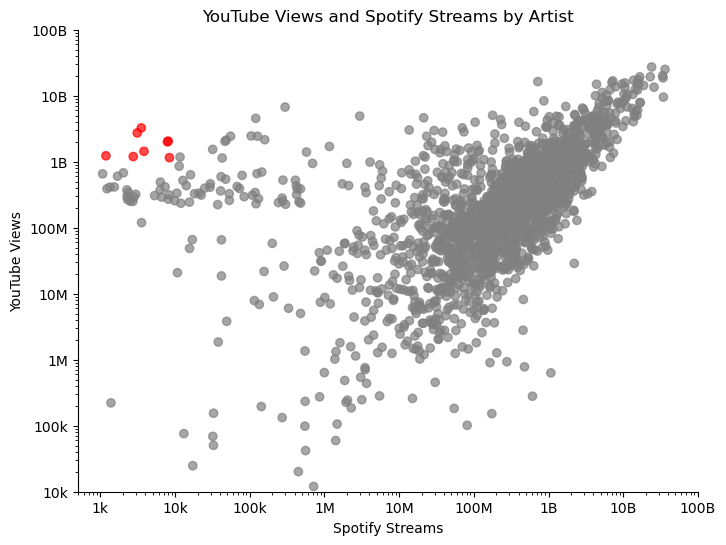

In [13]:

fig, ax = plt.subplots(figsize=(8,6))

# high_stream_low_views = spoyou[((spoyou['Spotify Streams'] > 10000000) & (spoyou['YouTube Views'] < 10000))]
high_views_low_stream = spoyou[((spoyou['YouTube Views'] > 1000000000) & (spoyou['Spotify Streams'] < 10000))]
print(high_views_low_stream)
x=spoyou['Spotify Streams']
y=spoyou['YouTube Views']
colors=[]
for artist in spoyou.index:
    if artist in set(high_views_low_stream.index.values):
        colors.append('red')
    else:
        colors.append('gray')
ax.set_xscale('log')
ax.set_yscale('log')

# slope, intercept = np.polyfit(x, y, 1)  # 1 indicates a linear fit (degree 1)

# # Generate points for the line
# line_x = np.linspace(x.quantile(.1), x.max(), 100)
# line_y = slope * line_x + intercept

# # Plot the line of best fit
# plt.plot(line_x, line_y, color='white', label='Line of Best Fit')


# ax.hlines(y=10000, xmin=10000000, xmax=100000000000, 
#           colors='red', linestyles='dashed', lw=1.5, label='')
# ax.vlines(x=10000000, ymin=0, ymax=10000, 
#           colors='red', linestyles='dashed', lw=1.5, label='')

# ax.hlines(y=100000000, xmin=0, xmax=10000, 
#           colors='orange', linestyles='dashed', lw=1.5, label='')
# ax.vlines(x=10000, ymin=100000000, ymax=100000000000, 
#           colors='orange', linestyles='dashed', lw=1.5, label='')

# ax.hlines(y=1068, xmin = 376842137, xmax = 5e9, color='red')
# set2 = dict(facecolor='#afc9b4', edgecolor='none')
# ax.text(5e9,700,"KHEA - Rapper(Argentina)",fontsize=10,fontname='serif', bbox=set2)


# ax.hlines(y=7595, xmin = 1e3, xmax = 99086405, color='red')
# ax.text(1e3,7595,"Uzielito Mix - DJ(Mexico)",fontsize=10,fontname='serif', bbox=set2)

# ax.hlines(y=179, xmin = 181784966, xmax = 5e9, color='red')
# ax.text(5e9,179,"Manu - Singer(Brazil)",fontsize=10,fontname='serif', bbox=set2)

# ax.hlines(y=2771, xmax = 1e9, xmin = 174154846, color='red')
# ax.text(1e9,2771,"Sam Barber - Country Singer(USA)",fontsize=10,fontname='serif', bbox=set2)
	
# ax.hlines(y=1172, xmax = 1e3, xmin = 14137400, color='red')
# ax.text(1e3,1172,"Angi Fire - Child Singer",fontsize=10,fontname='serif', bbox=set2)

			

ax.set_xlim(500, 100000000000)
ax.set_ylim(10000, 100000000000)

ax.set_xticks([int(10**x) for x in range(3,12)])
ax.set_xticklabels([ '1k', '10k', '100k', '1M', '10M', '100M', '1B','10B', '100B'])
ax.set_yticks([int(10**x) for x in range(4,12)])
ax.set_yticklabels([ '10k', '100k', '1M', '10M', '100M', '1B','10B', '100B'])
ax.scatter(x,y,alpha=.7, c=colors)
ax.set_xlabel('Spotify Streams')
ax.set_ylabel('YouTube Views')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('YouTube Views and Spotify Streams by Artist')

#ax.legend(loc='upper right')

#highlight the artists we want to look at
plt.show()


In [14]:
for art in high_views_low_stream.index.values:
    print(df.loc[df['Artist'] == art]['Track'])

4586    Bodak Yellow
Name: Track, dtype: object
82    Peekaboo
Name: Track, dtype: object
73    The Way We Move - Extended Mix
Name: Track, dtype: object
3797    BellaBella
Name: Track, dtype: object
1273    Hello
Name: Track, dtype: object
2511    Ch-Ch-Ch Chick (feat. Chick McGee)
Name: Track, dtype: object
468    Sabka Malik Ek
Name: Track, dtype: object
356    6. A.M.
Name: Track, dtype: object


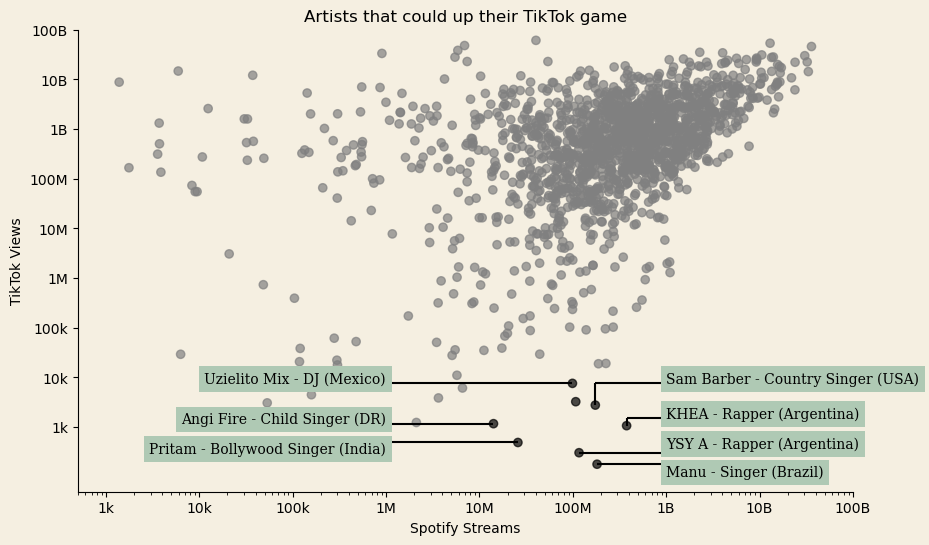

In [145]:
fig, ax = plt.subplots(figsize=(10,6))

high_stream_low_views = streams_views_by_artist[((streams_views_by_artist['Spotify Streams'] > 10000000) & (streams_views_by_artist['TikTok Views'] < 10000))]
high_views_low_stream = streams_views_by_artist[((streams_views_by_artist['TikTok Views'] > 100000000) & (streams_views_by_artist['Spotify Streams'] < 10000))]
x=streams_views_by_artist['Spotify Streams']
y=streams_views_by_artist['TikTok Views']
colors=[]
for artist in streams_views_by_artist.index:
    if artist in set(high_stream_low_views.index.values):
        colors.append('black')
    elif artist in set(high_views_low_stream.index.values):
        colors.append('gray')
    else:
        colors.append('gray')
ax.set_xscale('log')
ax.set_yscale('log')

# slope, intercept = np.polyfit(x, y, 1)  # 1 indicates a linear fit (degree 1)

# Generate points for the line
# line_x = np.linspace(x.quantile(.1), x.max(), 100)
# line_y = slope * line_x + intercept

# Plot the line of best fit
# plt.plot(line_x, line_y, color='white', label='Line of Best Fit')


# ax.hlines(y=10000, xmin=10000000, xmax=100000000000, 
#           colors='red', linestyles='dashed', lw=1.5, label='')
# ax.vlines(x=10000000, ymin=0, ymax=10000, 
#           colors='red', linestyles='dashed', lw=1.5, label='')

# ax.hlines(y=100000000, xmin=0, xmax=10000, 
#           colors='orange', linestyles='dashed', lw=1.5, label='')
# ax.vlines(x=10000, ymin=100000000, ymax=100000000000, 
#           colors='orange', linestyles='dashed', lw=1.5, label='')
set2 = dict(facecolor='#afc9b4', edgecolor='none')


ax.hlines(y=7595, xmax = 1e9, xmin = 174154846, color='black')
ax.vlines(x=174154846, ymin =2771, ymax=7579, color='black')
ax.text(1e9,7595,"Sam Barber - Country Singer (USA)",fontsize=10,fontname='serif', bbox=set2)

ax.hlines(y=1500, xmin = 376842137, xmax = 1e9, color='black')
ax.vlines(x=376842137, ymin =1068, ymax=1500, color='black')
ax.text(1e9,1500,"KHEA - Rapper (Argentina)",fontsize=10,fontname='serif', bbox=set2)

ax.hlines(y=305, xmin = 116625807, xmax = 1e9, color='black')
ax.text(1e9,375,"YSY A - Rapper (Argentina)",fontsize=10,fontname='serif', bbox=set2)


ax.hlines(y=179, xmin = 181784966, xmax = 1e9, color='black')
ax.text(1e9,100,"Manu - Singer (Brazil)",fontsize=10,fontname='serif', bbox=set2)

	
ax.hlines(y=7595, xmin = 1e6, xmax = 99086405, color='black')
ax.text(1e6,7595,"Uzielito Mix - DJ (Mexico)",fontsize=10,fontname='serif', bbox=set2,ha='right')

ax.hlines(y=1172, xmax = 1e6, xmin = 14137400, color='black')
ax.text(1e6,1172,"Angi Fire - Child Singer (DR)",fontsize=10,fontname='serif', bbox=set2, ha='right')

ax.hlines(y=490, xmax = 25820250, xmin = 1e6, color='black')
ax.text(1e6,300,"Pritam - Bollywood Singer (India)",fontsize=10,fontname='serif', bbox=set2, ha='right')


ax.set_xlim(500, 100000000000)
ax.set_ylim(50, 100000000000)

ax.set_xticks([int(10**x) for x in range(3,12)])
ax.set_xticklabels([ '1k', '10k', '100k', '1M', '10M', '100M', '1B','10B', '100B'])
ax.set_yticks([int(10**x) for x in range(3,12)])
ax.set_yticklabels([ '1k', '10k', '100k', '1M', '10M', '100M', '1B','10B', '100B'])
ax.scatter(x,y,alpha=.7,c=colors)
ax.set_xlabel('Spotify Streams')
ax.set_ylabel('TikTok Views')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Artists that could up their TikTok game')

ax.set_facecolor(color='#f5efe1')
fig.patch.set_facecolor('#f5efe1')

#ax.legend(loc='upper right')

#highlight the artists we want to look at
plt.show()

In [16]:
high_stream_low_views

,Spotify Streams,TikTok Views,tik_diff
Artist,,,
KHEA,376842137,1068,-3.528474e+05
Manu,181784966,179,-1.015557e+06
Sam Barber,174154846,2771,-6.284810e+04
YSY A,116625807,305,-3.823787e+05
Heuss L'enfoirï¿,107498014,3247,-3.310587e+04
Uzielito Mix,99086405,7595,-1.304527e+04
Pritam,25820250,490,-5.269339e+04
Angi Fire,14137400,1172,-1.206163e+04


In [17]:
high_views_low_stream

,Spotify Streams,TikTok Views,tik_diff
Artist,,,
Matteo Rossanese,5936,14730433978,1.000000
ýýýýýýýýý ýýýýýýýýýýýýýýýýýýýýý,3872,135542729,0.999971
Barracca Republic,3739,504872722,0.999993
BCD Studio,3711,1319467906,0.999997
TOADI,3574,312937612,0.999989
YolyBoy,1761,166506168,0.999989
mitsu sound,1384,8811416708,1.000000


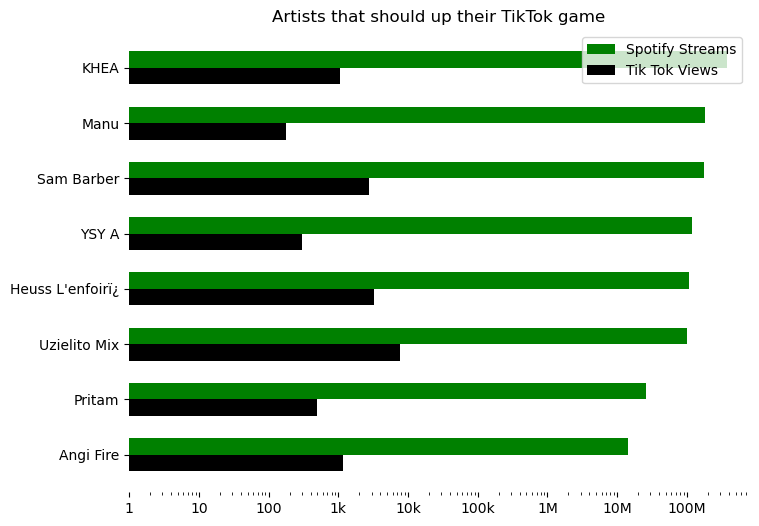

In [18]:
fig, ax =plt.subplots(figsize=(8,6))
h=0.3
views= high_stream_low_views['TikTok Views']
streams=high_stream_low_views['Spotify Streams']
artists=high_stream_low_views.index.values
ax.barh(np.arange(len(artists))-h/2, streams,height=h, label='Spotify Streams',color='green')
ax.barh(np.arange(len(artists))+h/2, views,height=h, label='Tik Tok Views', color='black')

ax.set_xscale('log')
ax.set_xticks([1, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8])
ax.set_xticklabels(['1', '10', '100', '1k', '10k', '100k', '1M', '10M', '100M'])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_title('Artists that should up their TikTok game')
plt.gca().invert_yaxis()
ax.set_yticks(np.arange(len(artists)))
ax.set_yticklabels(artists)
ax.legend(loc='best')
plt.show()

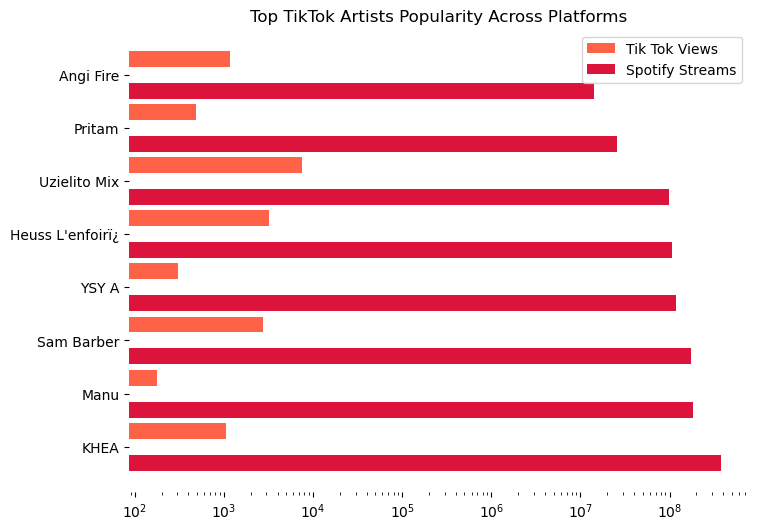

100000000.0

In [19]:


x_ticks = [0, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000]
h=0.3


fig, ax =plt.subplots(figsize=(8,6))

ax.barh(np.arange(len(artists))+h, views,height=h, label='Tik Tok Views', color='tomato')
# ax.barh(np.arange(len(artists)), yt_views,height=h, label='Youtube Views',color='firebrick')
#ax.barh(np.arange(len(artists))+h, posts,height=h, label='Posts', color='green')
ax.barh(np.arange(len(artists))-h, streams ,height=h, label='Spotify Streams', color='crimson')

ax.set_xscale('log')
# ax.set_xticks(x_ticks)
# ax.set_xticklabels(['0', '10', '100', '1k', '10k', '100k', '1M', '10M', '100M', '1B'])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_title('Top TikTok Artists Popularity Across Platforms')
#ax.set_xticks([10e6, 10e7,10e8,10e9,10e10])
#ax.set_xticklabels(['10M','100M', '1B', '10B', '100B'])
ax.set_yticks(np.arange(len(artists)))
ax.set_yticklabels(artists)
ax.legend(loc='best')
plt.show()
100000000.0



In [20]:
total_tik = []

ax.barh(x,y)
plt.show()


In [21]:

    
df_cleaned['views_ps'] = df_cleaned['TikTok Views'] / df_cleaned['Spotify Streams']
df_cleaned['likes_ps']=df_cleaned['TikTok Likes'] / df_cleaned['Spotify Streams']
df_cleaned['posts_ps']=df_cleaned['TikTok Posts'] / df_cleaned['Spotify Streams']

df_cleaned['views_ps']

/var/folders/vb/c_7gcdvd2kg4s_jdwfky3xhm0000gn/T/ipykernel_34931/686603213.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['views_ps'] = df_cleaned['TikTok Views'] / df_cleaned['Spotify Streams']
/var/folders/vb/c_7gcdvd2kg4s_jdwfky3xhm0000gn/T/ipykernel_34931/686603213.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['likes_ps']=df_cleaned['TikTok Likes'] / df_cleaned['Spotify Streams']
/var/folders/vb/c_7gcdvd2kg4s_jdwfky3xhm0000gn/T/ipykernel_34931/686603213.py:3: SettingWith

0       1.365603e+01
1       6.436099e-01
2       5.602975e+00
3       7.189418e+00
4       9.342745e-09
            ...     
4595    4.718387e-01
4596    3.812950e-04
4597    1.939700e-01
4598    2.595592e-01
4599    2.744827e-01
Name: views_ps, Length: 4487, dtype: float64

In [22]:
artist_view_pf =df_cleaned.groupby('Artist')['views_ps'].sum().sort_values()[:-16:-1]
streams_by_artist= df_cleaned.groupby('Artist')['Spotify Streams'].sum()
views_by_artist = df_cleaned.groupby('Artist')['TikTok Views'].sum()

artists = artist_view_pf.index.values
streamsl = []
viewsl =[]
for artist in artists:
    streams = streams_by_artist.loc[artist]
    views = views_by_artist[artist]
    streamsl.append(streams)
    viewsl.append(views)
        
print(streamsl)
print(viewsl)
print(artists)



[1384, 5936, 3711, 37291, 12415, 3739, 1761, 3574, 30269, 1940236, 32753, 142732, 902103, 3872, 10762]
[8811416708, 14730433978, 1319467906, 12110114842, 2586057582, 504872722, 166506168, 312937612, 1603097724, 2871179476, 1598275820, 5316677737, 33359398879, 135542729, 274491219]
['mitsu sound' 'Matteo Rossanese' 'BCD Studio' 'OP' 'Donny Fernanda'
 'Barracca Republic' 'YolyBoy' 'TOADI' 'Chau Dang Khoa' 'HCTM'
 'HarmonicoHCO' 'Aurel Surya Lie' 'Dante9k'
 'ýýýýýýýýý ýýýýýýýýýýýýýýýýýýýýý' 'Mehmood J']


In [23]:


stream_cols=[ 'Spotify Streams', 'YouTube Views', 'TikTok Views', 'AirPlay Spins', 'SiriusXM Spins', 'Pandora Streams',
              'Soundcloud Streams', 'Shazam Counts']



# for col in stream_cols:
#       print(col ,df_cleaned[col].dtype)
#       df_cleaned[col] = df_cleaned[col].str.replace(',','')
#       new_col=[]
#       for t in df_cleaned[col]:
#             if str.lower(t) == 'nan':
#                   new_col.append(df_cleaned[col].median())
#             else: 
#                   new_col.append(int(t))
#       df_cleaned[col] = new_col
#       print(col ,df_cleaned[col].dtype)


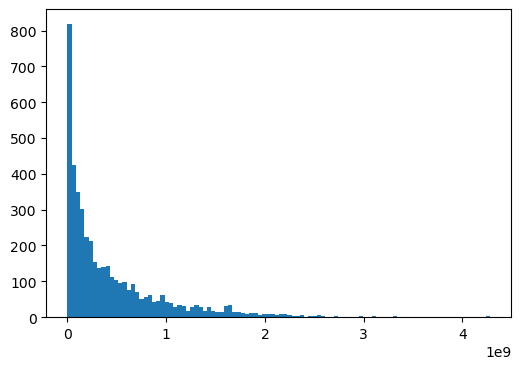

In [24]:
fig, ax = plt.subplots(figsize=(6,4))

ax.hist(df_cleaned['Spotify Streams'], bins=100)

plt.show()

#This is about what I expected. A few songs are extremely popular,
#  and most songs have a relatively small number of streams


In [25]:
print(df_cleaned['Spotify Streams'].quantile([.01, .1, .25, .5, .75, .9, .99]))


0.01    9.834700e+03
0.10    1.387903e+07
0.25    7.038630e+07
0.50    2.398507e+08
0.75    6.283638e+08
0.90    1.190402e+09
0.99    2.307692e+09
Name: Spotify Streams, dtype: float64


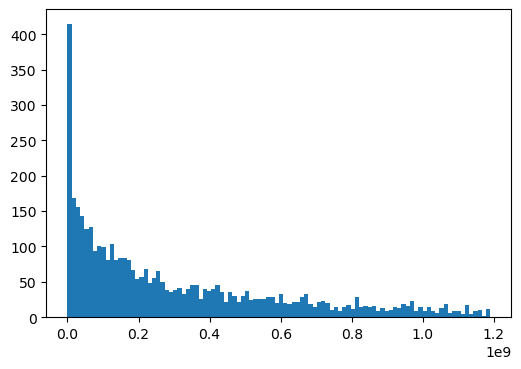

In [26]:
#Lets look at our distribution without the outliers
fig, ax = plt.subplots(figsize=(6,4))

low_90 = df_cleaned[df_cleaned['Spotify Streams'] < df_cleaned['Spotify Streams'].quantile(0.90)]

ax.hist(low_90['Spotify Streams'], bins=100)

plt.show()

#Distribution looks exponential? 

In [27]:
df_cleaned[df_cleaned['Spotify Streams']== df_cleaned['Spotify Streams'].max()]

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track,views_ps,likes_ps,posts_ps
55,Blinding Lights,Blinding Lights,The Weeknd,11/29/2019,USUG11904206,56,194.0,4281468720,"590,392","165,544,011",...,184.0,"489,299,762","319,634","28,659,471","28,994,660",NaN,0,0.817751,0.078787,0.000673


In [28]:
df_cleaned.select_dtypes(include=['number'])

,Track Score,Spotify Streams,Spotify Popularity,YouTube Views,TikTok Posts,TikTok Likes,TikTok Views,Apple Music Playlist Count,Deezer Playlist Count,Amazon Playlist Count,TIDAL Popularity,Explicit Track,views_ps,likes_ps,posts_ps
0,725.4,390470936,92.0,84274754,5767700,651565900,5332281936,210.0,62.0,114.0,NaN,0,1.365603e+01,1.668667e+00,1.477114e-02
1,545.9,323703884,92.0,116347040,674700,35223547,208339025,188.0,67.0,111.0,NaN,1,6.436099e-01,1.088141e-01,2.084312e-03
2,538.4,601309283,92.0,122599116,3025400,275154237,3369120610,190.0,136.0,172.0,NaN,0,5.602975e+00,4.575919e-01,5.031354e-03
3,444.9,2031280633,85.0,1096100899,7189811,1078757968,14603725994,394.0,264.0,210.0,NaN,0,7.189418e+00,5.310728e-01,3.539546e-03
4,423.3,107034922,88.0,77373957,16400,1,1,182.0,82.0,105.0,NaN,1,9.342745e-09,9.342745e-09,1.532210e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,19.4,305049963,71.0,149247747,48370,20202000,143934379,3.0,2.0,NaN,NaN,1,4.718387e-01,6.622522e-02,1.585642e-04
4596,19.4,52282360,56.0,943920245,1,1721,19935,1.0,1.0,NaN,NaN,0,3.812950e-04,3.291741e-05,1.912691e-08
4597,19.4,189972685,65.0,201027333,7596,5288677,36849005,19.0,1.0,6.0,NaN,1,1.939700e-01,2.783914e-02,3.998470e-05
4598,19.4,145467020,66.0,1118595159,11433,2534831,37757301,1.0,NaN,7.0,NaN,0,2.595592e-01,1.742547e-02,7.859513e-05


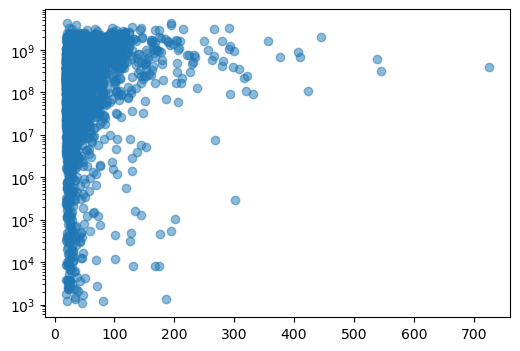

In [29]:
fig, ax = plt.subplots(figsize=(6,4))

ax.scatter(df_cleaned['Track Score'], df_cleaned['Spotify Streams'], alpha=.5)
# ax.set_xscale('log')

ax.set_yscale('log')
plt.show()

In [30]:
df_cleaned.sort_values(by='Spotify Streams', ascending=False).head(20)


,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track,views_ps,likes_ps,posts_ps
55,Blinding Lights,Blinding Lights,The Weeknd,11/29/2019,USUG11904206,56,194.0,4281468720,"590,392","165,544,011",...,184.0,"489,299,762","319,634","28,659,471","28,994,660",NaN,0,8.177515e-01,7.878665e-02,6.731484e-04
4254,Blinding Lights,Blinding Lights,xSyborg,3/13/2021,QZLBC2302779,"4,229",20.5,4261328190,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,2.346686e-10,2.346686e-10,2.346686e-10
53,Shape of You,Shape of You,Ed Sheeran,1/6/2017,GBAHS1600463,54,195.1,3909458734,"316,378","148,037,882",...,115.0,"733,565,655","651,557","78,149,375","1,146,246",NaN,0,5.936516e-01,4.973068e-02,5.807236e-04
1637,Shape of You,Shape of You,xSyborg,2/20/2021,QZLBC2302789,"1,807",36.3,3888356417,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,2.571781e-10,2.571781e-10,2.571781e-10
132,Someone You Loved,Breach,Lewis Capaldi,11/8/2018,DEUM71807062,133,129.7,3427498835,"338,763","160,553,919",...,110.0,"427,212,257","357,540",NaN,"29,266,297",NaN,0,6.304983e-01,6.185490e-02,5.661484e-04
114,Sunflower - Spider-Man: Into the Spider-Verse,Sunflower (Spider-Man: Into the Spider-Verse),Post Malone,10/18/2018,USUM71814888,116,143.9,3358704125,"392,082","123,917,182",...,99.0,"546,367,356","906,813",NaN,"1,569,935",NaN,0,4.756161e-01,5.324358e-02,8.080896e-04
19,As It Was,As It Was,Harry Styles,3/31/2022,USSM12200612,20,292.0,3301814535,"407,119","169,783,402",...,189.0,"132,624,772","79,909",NaN,"14,967,379",NaN,0,4.665883e+00,4.948705e-01,8.346632e-04
3406,As It Was,As It Was (Official Video),Harry Styles,3/31/2022,USSM22200594,"3,410",23.5,3299082422,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,0,3.031146e-10,3.031146e-10,3.031146e-10
262,Starboy,Starboy,The Weeknd,9/22/2016,USUG11600976,265,95.7,3291262413,"366,133","98,022,646",...,67.0,"331,295,154","418,888","23,612,071","15,648,166",NaN,1,1.140894e-01,1.601449e-02,7.984170e-05
519,One Dance,One Dance (feat. Wizkid & Kyla) - Single,Drake,4/4/2016,USCM51600028,518,67.9,3192204066,"379,853","131,832,723",...,97.0,"714,508,129","601,041",NaN,"21,316,589",NaN,0,1.217166e-01,1.604760e-02,7.459865e-04


In [31]:
artist_streams= df_cleaned.groupby('Artist')['Spotify Streams'].sum()
#artist_streams = artist_streams.reset_index()

artist_streams = artist_streams.sort_values(ascending=False)


top15=artist_streams[:15]



for artist in top15.index.values:
    song_streams= [i for i in df_cleaned[df_cleaned['Artist'] == artist]['Spotify Streams']]
    

ed = df_cleaned.loc[df_cleaned['Artist'] == 'Ed Sheeran']



ed_streams= ([i for i in df_cleaned[df_cleaned['Artist'] == artist]['Spotify Streams']])




In [32]:
df_cleaned['Release Date'] = pd.to_datetime(df_cleaned['Release Date'])
streams_date = [(streams, date) for streams, date in df_cleaned.loc[df_cleaned['Artist'] == 'Ed Sheeran', ['Spotify Streams', 'Release Date']].values]


/var/folders/vb/c_7gcdvd2kg4s_jdwfky3xhm0000gn/T/ipykernel_34931/89677387.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Release Date'] = pd.to_datetime(df_cleaned['Release Date'])


In [180]:
top15=artist_streams[:15].sort_values()
df_cleaned.loc[df_cleaned['Artist'] == 'Drake'].sort_values(by='Spotify Streams')


,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track,views_ps,likes_ps,posts_ps
4208,All The Parties (feat. Chief Keef),For All The Dogs,Drake,2023-10-06,USUG12306081,"4,177",20.7,48556312,"18,674","2,057,602",...,1.0,"1,338,774",545,"2,264,570","94,446",NaN,1,0.084405,0.011518,1.299522e-05
3178,What Would Pluto Do,For All The Dogs,Drake,2023-10-06,USUG12306080,"3,175",24.5,59262518,"22,927","2,972,767",...,NaN,"18,555,902","1,636",NaN,"124,136",NaN,1,0.001501,0.000060,1.079941e-06
3546,Another Late Night (feat. Lil Yachty),For All The Dogs,Drake,2023-10-06,USUG12306086,"3,535",22.9,61355849,"24,182","4,216,247",...,NaN,"636,999",476,NaN,"141,072",NaN,1,0.262739,0.022274,8.493078e-05
4093,Members Only (feat. PARTYNEXTDOOR),For All The Dogs,Drake,2023-10-06,USUG12306079,"4,075",21.1,64168685,"21,270","4,593,922",...,1.0,"3,126,381","1,798",NaN,"222,113",NaN,1,0.000180,0.000015,1.558393e-08
4388,Fear Of Heights,For All The Dogs,Drake,2023-10-06,USUG12306069,"4,358",20.1,65870686,"22,047","2,768,716",...,1.0,"1,809,622",543,NaN,"62,951",NaN,1,0.006155,0.000572,2.049470e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1598,Hotline Bling,Hotline Bling,Drake,2015-07-31,USCM51500238,"1,588",36.7,1335494972,"205,003","49,738,762",...,55.0,"413,500,693","573,437",NaN,"11,339,270",NaN,0,0.212857,0.028546,1.341923e-03
770,In My Feelings,Scorpion,Drake,2018-06-29,USCM51800206,766,55.4,1389607643,"179,820","36,937,605",...,53.0,"344,214,850","668,750",NaN,"7,188,287",NaN,1,0.374937,0.033432,2.115863e-04
1314,Passionfruit,More Life,Drake,2017-03-18,USCM51700072,"1,309",41.1,1625307365,"288,559","72,837,714",...,28.0,"176,739,390","142,939","7,711,539","5,160,420",NaN,0,0.558355,0.088640,1.140190e-04
277,God's Plan,Diplomatic Immunity,Drake,2018-01-20,USCM51800004,278,92.9,2529948475,"313,741","79,266,167",...,76.0,"527,043,451","707,727",NaN,"9,512,236",NaN,1,0.250668,0.027896,2.533150e-04


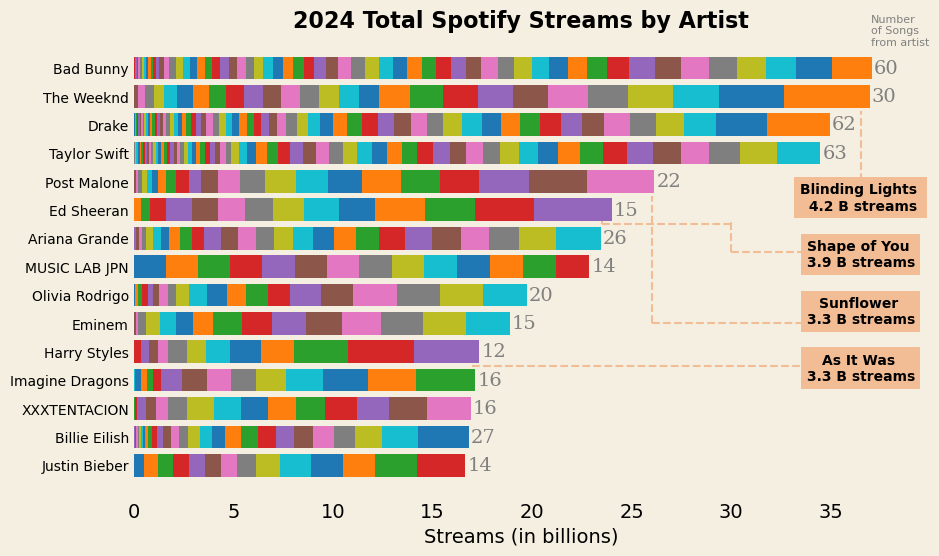

In [183]:
fig, ax = plt.subplots(figsize=(10,6))
top15=artist_streams[:15].sort_values()

x=list(top15.index.values[:15])
y=list(top15.values[:15])

for artist in top15.index.values:
    song_streams= sorted([i for i in df_cleaned[df_cleaned['Artist'] == artist]['Spotify Streams']])
    cumsum=0
    for i, val in enumerate(song_streams):
        ax.barh(artist, val, left=cumsum)
        cumsum+=val
    ax.text(cumsum + 1e8, artist, len(song_streams), fontsize=14, fontname='serif', va='center', color='gray')


set1 = dict(facecolor='#f2bc94', edgecolor='none')

ax.vlines(x=36.5e9, ymin=10, ymax=12.5, colors='#f2bc94', linestyles='dashed', lw=1.5, label='Threshold')
ax.text(36.5e9 , 9, 'Blinding Lights \n 4.2 B streams', fontsize=10, weight='bold', ha='center', bbox=set1)

set2 = dict(facecolor='purple', edgecolor='none')

ax.vlines(x=23.5e9, ymin=8.5, ymax=8.6, colors='#f2bc94', linestyles='dashed', lw=1.5, label='Threshold')
ax.hlines(y=8.5, xmin=23.5e9, xmax=30e9, colors='#f2bc94', linestyles='dashed', lw=1.5, label='Threshold')
ax.vlines(x=30e9, ymin=7.5, ymax=8.6, colors='#f2bc94', linestyles='dashed', lw=1.5, label='Threshold')
ax.hlines(y=7.5, xmin=30e9, xmax=36.5e9, colors='#f2bc94', linestyles='dashed', lw=1.5, label='Threshold')
ax.text(36.5e9 , 7, 'Shape of You \n3.9 B streams', fontsize=10,color='black',weight='bold',  ha='center', bbox=set1)

set3 = dict(facecolor='pink', edgecolor='none')

ax.vlines(x=26e9, ymin=5, ymax=9.5, colors='#f2bc94', linestyles='dashed', lw=1.5, label='Threshold')
ax.hlines(y=5, xmin=26.e9, xmax=36.5e9, colors='#f2bc94', linestyles='dashed', lw=1.5, label='Threshold')
ax.text(36.5e9 , 5, 'Sunflower \n3.3 B streams', fontsize=10,color='black',weight='bold',  ha='center', bbox=set1)

# ax.vlines(x=26e9, ymin=5, ymax=9.5, colors='pink', linestyles='dashed', lw=1.5, label='Threshold')
ax.hlines(y=3.5, xmin=17e9, xmax=36.5e9, colors='#f2bc94', linestyles='dashed', lw=1.5, label='Threshold')
ax.text(36.5e9 , 3, 'As It Was \n3.3 B streams', fontsize=10,weight='bold',color='black',  ha='center', bbox=set1)

ax.text(37e9 , 14.8, 'Number\nof Songs\nfrom artist', fontsize=8,color='gray',  ha='left')



ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel('Streams (in billions)', size=14)
ax.set_title('2024 Total Spotify Streams by Artist', weight='bold', size=16)


ax.set_xticks([0, 5e9, 1e10,15e9, 2e10,25e9, 3e10, 35e9])
ax.set_xticklabels([0, 5,10,15,20,25,30,35], size=14)

ax.tick_params(axis='both', length=0)

ax.set_facecolor(color='#f5efe1')
fig.patch.set_facecolor('#f5efe1')

# ax.barh(' ', 3.8e9, left=33e9)
# ax.text(33e9, 14.9, 'One Song', color='gray', weight='bold')
plt.show()

10000000000.0


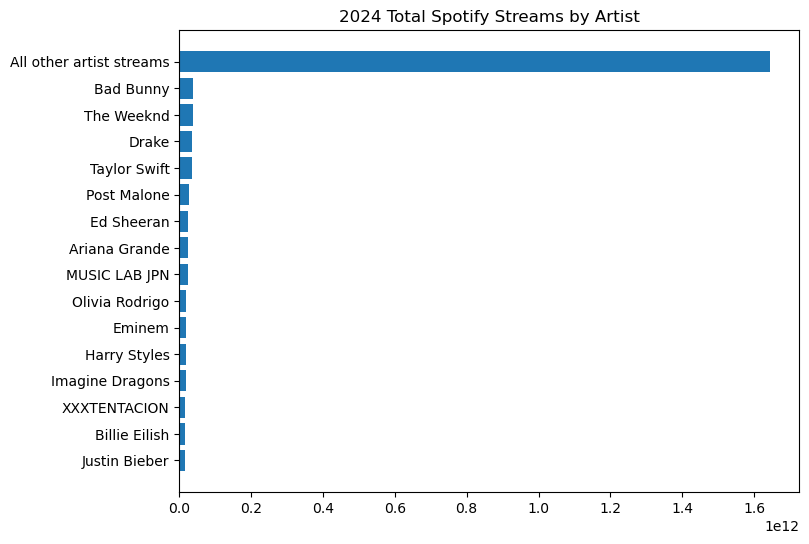

In [35]:
fig, ax = plt.subplots(figsize=(8,6))

rest_of_artists = artist_streams.values[15:].sum()

x=list(top15.index.values[:15])+['All other artist streams']
y=list(top15.values[:15]) +[rest_of_artists]


ax.set_title('2024 Total Spotify Streams by Artist')
ax.barh(x,y)
print(1e10)
10000000000.0
plt.show()

In [217]:
df_cleaned['All Time Rank'] = df_cleaned['All Time Rank'].astype(str).str.replace(',', '').astype(float).astype(int)

toprank = df_cleaned[(df_cleaned['All Time Rank']) <= 104]

print(toprank)



                          Track                            Album Name  \
0           MILLION DOLLAR BABY          Million Dollar Baby - Single   
1                   Not Like Us                           Not Like Us   
2    i like the way you kiss me            I like the way you kiss me   
3                       Flowers                      Flowers - Single   
4                       Houdini                               Houdini   
..                          ...                                   ...   
99                        Prada                                 Prada   
100        Montagem Rave Eterno                  Montagem Rave Eterno   
101               Lil Boo Thang                         Lil Boo Thang   
102                      MONACO  nadie sabe lo que va a pasar maï¿½ï¿   
103          Laxed (Siren Beat)                    Laxed (Siren Beat)   

             Artist Release Date          ISRC  All Time Rank  Track Score  \
0     Tommy Richman   2024-04-26  QM24S240252

/var/folders/vb/c_7gcdvd2kg4s_jdwfky3xhm0000gn/T/ipykernel_34931/546408846.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['All Time Rank'] = df_cleaned['All Time Rank'].astype(str).str.replace(',', '').astype(float).astype(int)


In [221]:
print(toprank.iloc[25:30])

                                       Track  \
26                 STAY (with Justin Bieber)   
27                                Baby Shark   
28  we can't be friends (wait for your love)   
29                             Numb / Encore   
30                      Danza Kuduro - Cover   

                                           Album Name         Artist  \
26                          STAY (with Justin Bieber)  The Kid LAROI   
27                      ýýýýýýýýý ýýýýýý ýýýýýýýýýýýý       Pinkfong   
28                                   eternal sunshine  Ariana Grande   
29                                          Papercuts          JAY-Z   
30  ýýýýýýýýýýýýýýýýýýýýýýýýýýý ýýýýýýýýýýýýýýýýýý...   LOVE BGM JPN   

   Release Date          ISRC  All Time Rank  Track Score  Spotify Streams  \
26   2021-07-09  USSM12103949             27        266.3       3107100349   
27   2015-12-01  KRE671700001             28        265.7        720822868   
28   2024-03-08  USUM72317276             29

In [225]:
years = toprank['Release Date'].dt.year.values
quarters  =toprank['Release Date'].dt.quarter

qy = [f"{quarter}, {year}" for quarter, year in zip(quarters, years)]

toprank['qy'] = qy
qy_rank = toprank.groupby('qy')['All Time Rank'].mean()



qy_rank

/var/folders/vb/c_7gcdvd2kg4s_jdwfky3xhm0000gn/T/ipykernel_34931/1918894683.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toprank['qy'] = qy


qy
1, 2017    61.666667
1, 2019    75.000000
1, 2022    43.000000
1, 2023    63.230769
1, 2024    39.272727
2, 2019    40.000000
2, 2020    87.500000
2, 2021    82.000000
2, 2022    59.666667
2, 2023    61.500000
2, 2024    33.461538
3, 2021    27.000000
3, 2022    62.000000
3, 2023    61.500000
4, 2015    28.000000
4, 2019    56.000000
4, 2021    88.000000
4, 2022    65.600000
4, 2023    68.500000
Name: All Time Rank, dtype: float64

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]
['1 2016', '2 2016', '3 2016', '4 2016', '1 2017', '2 2017', '3 2017', '4 2017', '1 2018', '2 2018', '3 2018', '4 2018', '1 2019', '2 2019', '3 2019', '4 2019', '1 2020', '2 2020', '3 2020', '4 2020', '1 2021', '2 2021', '3 2021', '4 2021', '1 2022', '2 2022', '3 2022', '4 2022', '1 2023', '2 2023', '3 2023', '4 2023', '1 2024', '2 2024', '3 2024', '4 2024']


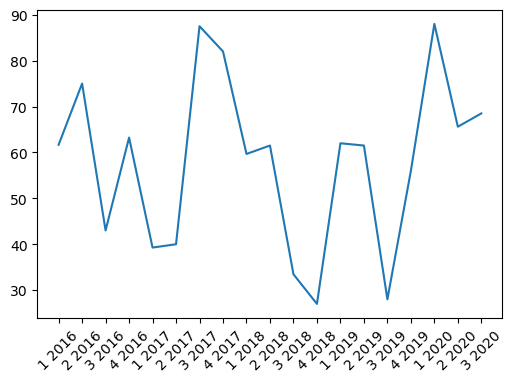

In [236]:
fig, ax = plt.subplots(figsize=(6,4))
x=qy_rank.index.values
y=qy_rank.values
ayears = [y for y in range(2016,2025)]
ayq = [f"{quarter} {y}" for y in ayears for quarter in range(1, 5)]
ticks = [i for i in range(len(ayq))]
print(ticks)
print(ayq)
ax.set_xticks(ticks)
ax.set_xticklabels(ayq, rotation = 45)
ax.plot(x,y)
plt.show()